In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle

import os, shutil
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import iefc_2dm as iefc
from wfsc import utils


INFO:numexpr.utils:Note: detected 96 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 96 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
data_set_name = 'hlc_annular_iefc_sim_v1'

iefc_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data')


In [9]:
response_cubes = np.array(misc.load_pickle(iefc_dir/data_set_name/'response_cubes'))
images = cp.array(misc.load_pickle(iefc_dir/data_set_name/'images')).get()
dm1_acts = np.array(misc.load_pickle(iefc_dir/data_set_name/'dm1_acts'))
dm2_acts = np.array(misc.load_pickle(iefc_dir/data_set_name/'dm2_acts'))

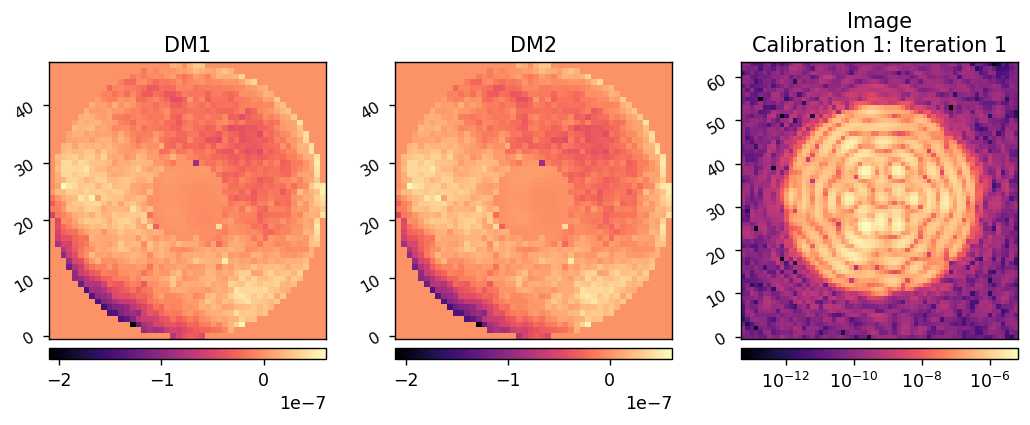

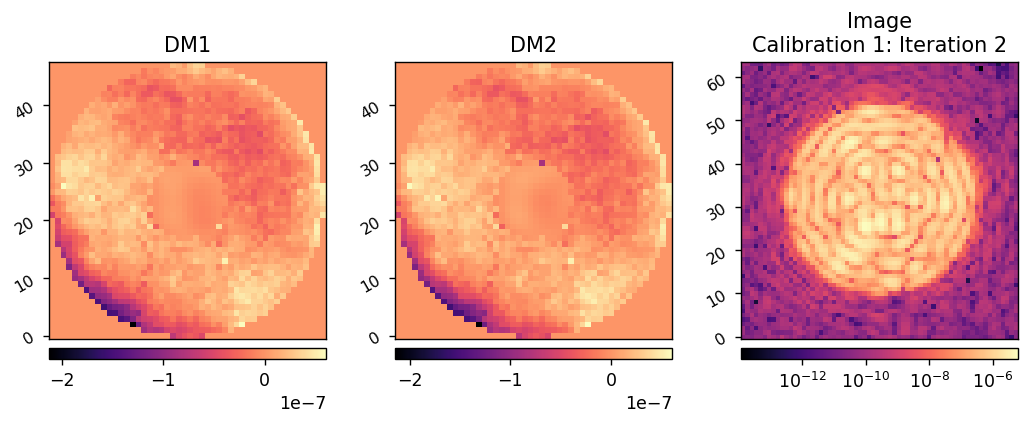

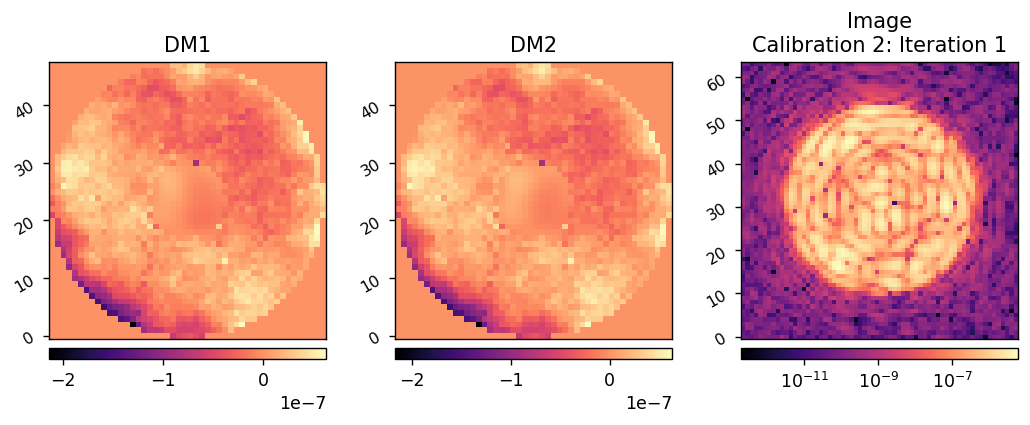

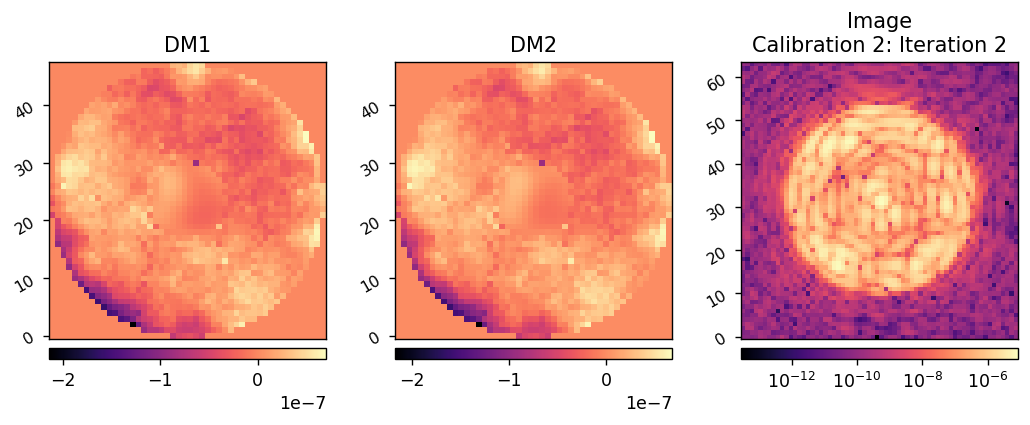

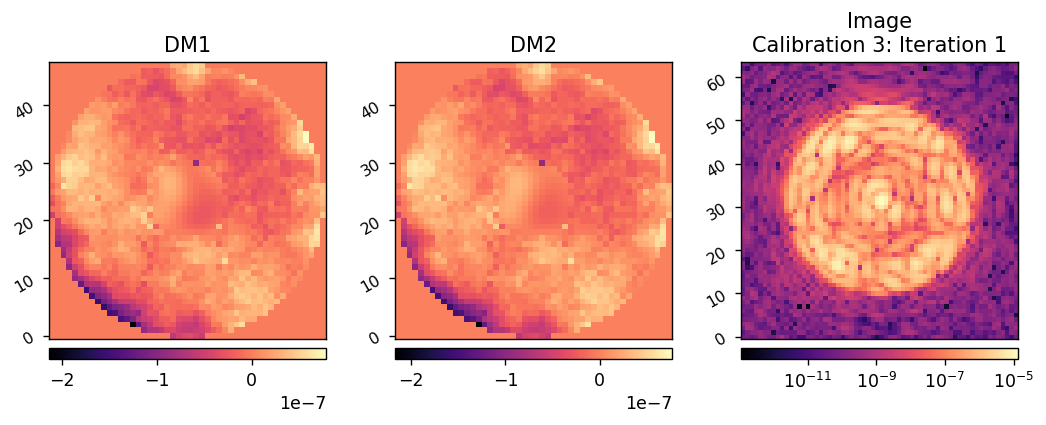

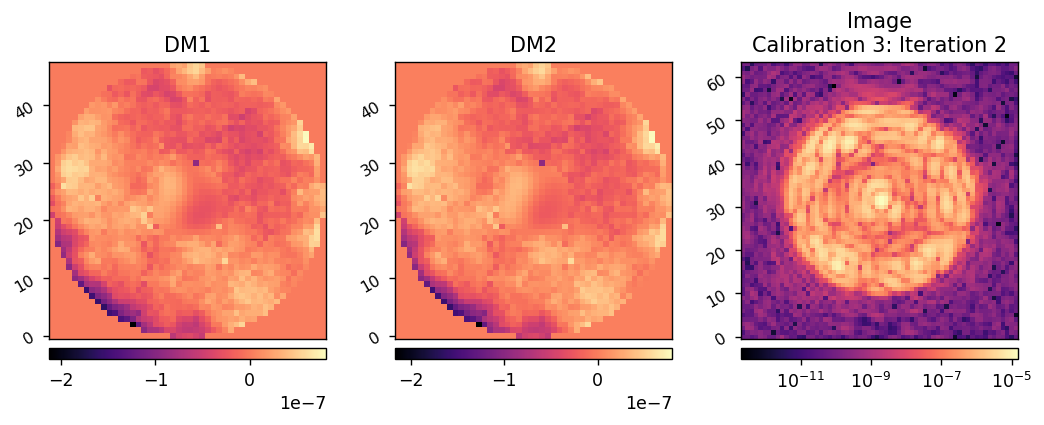

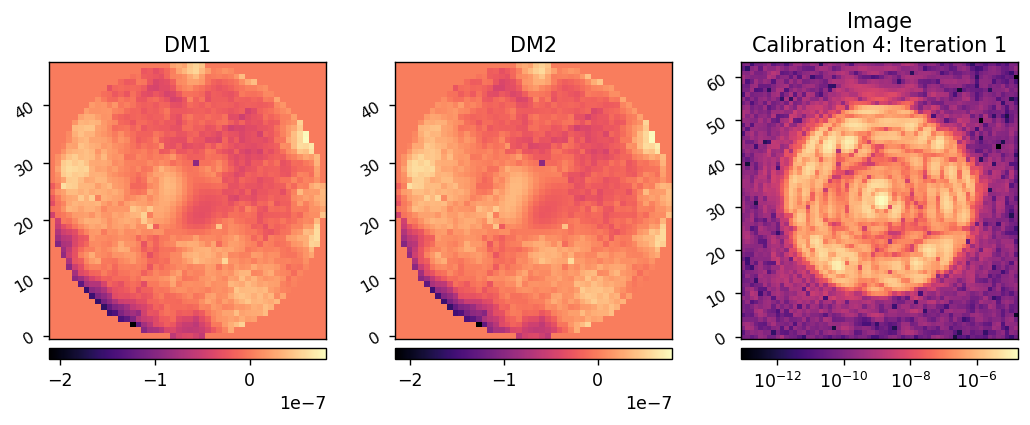

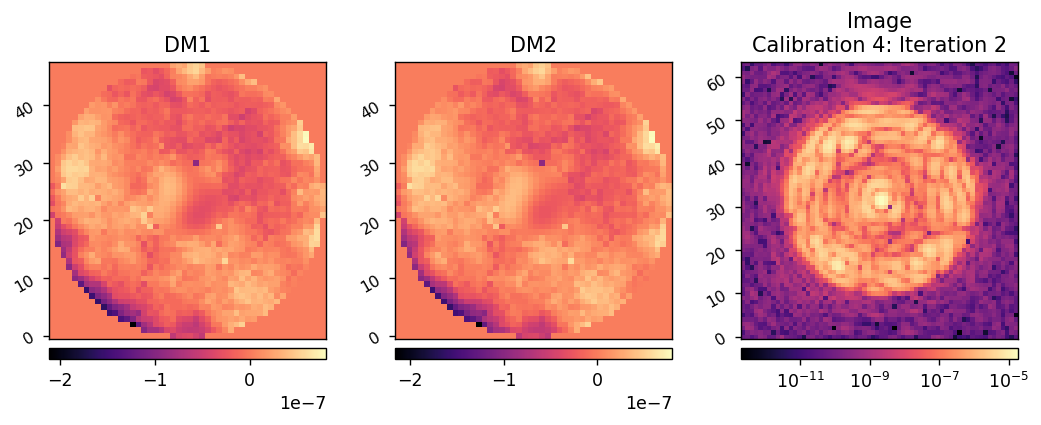

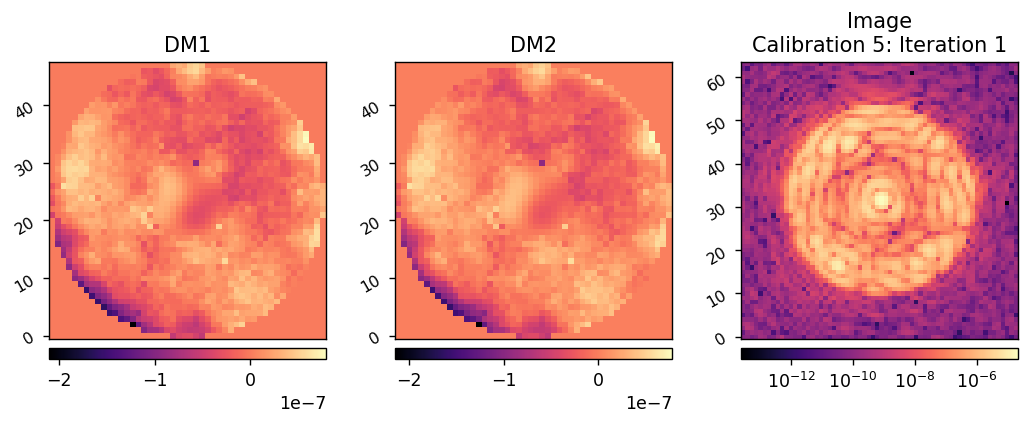

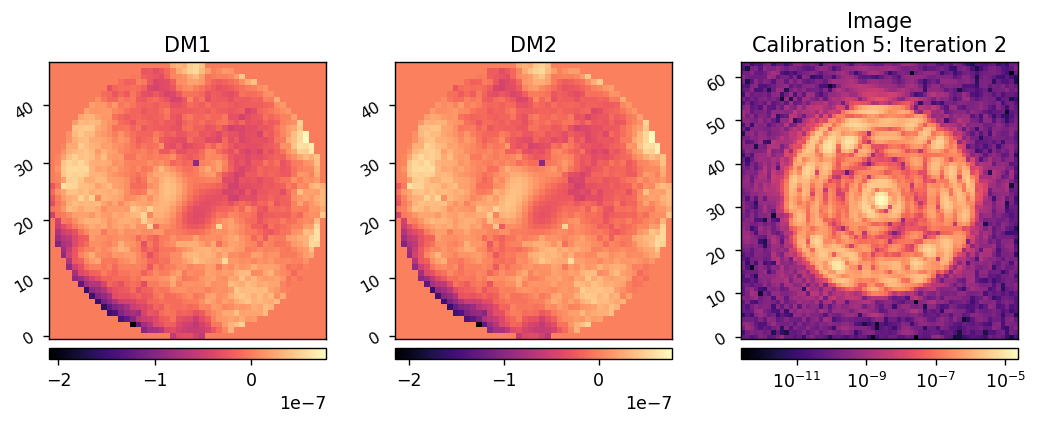

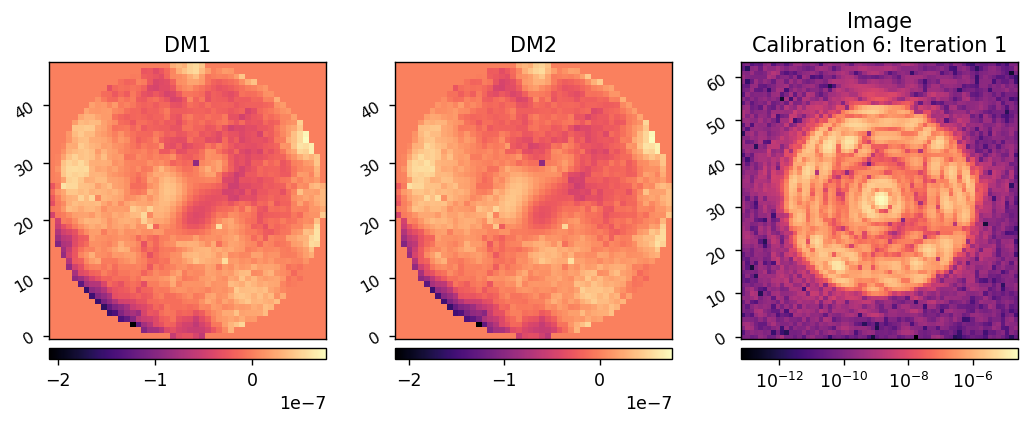

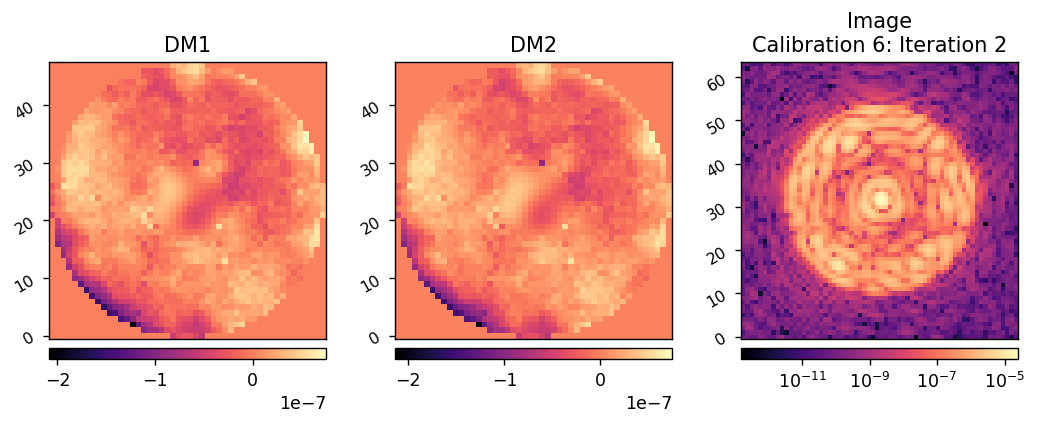

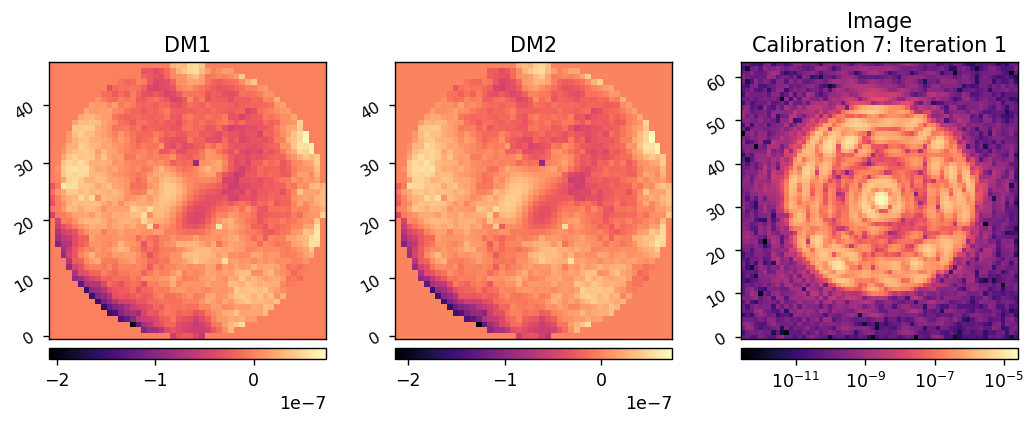

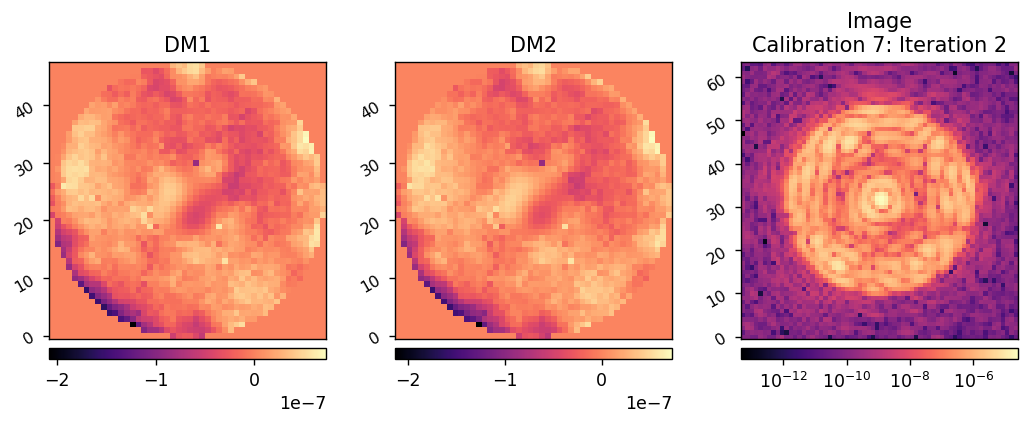

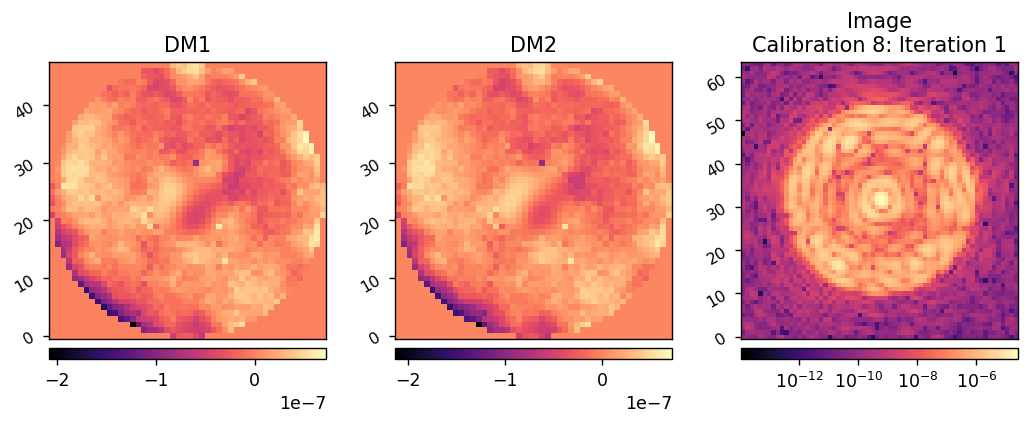

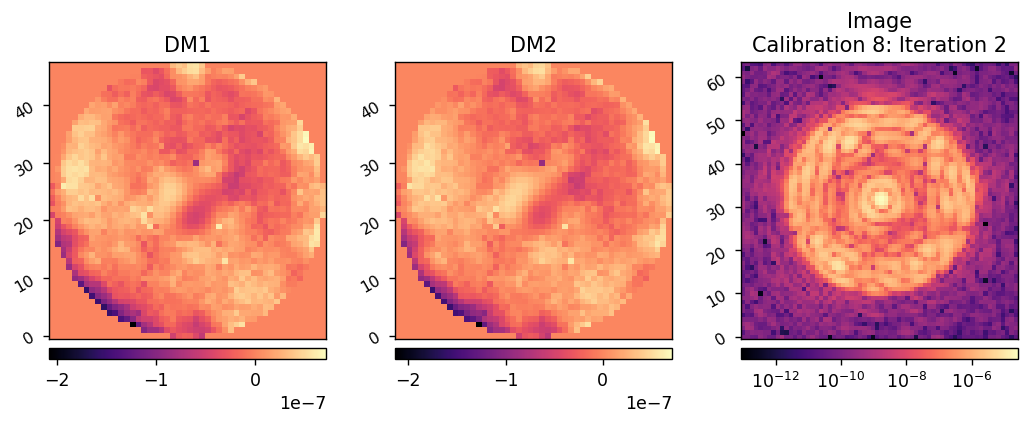

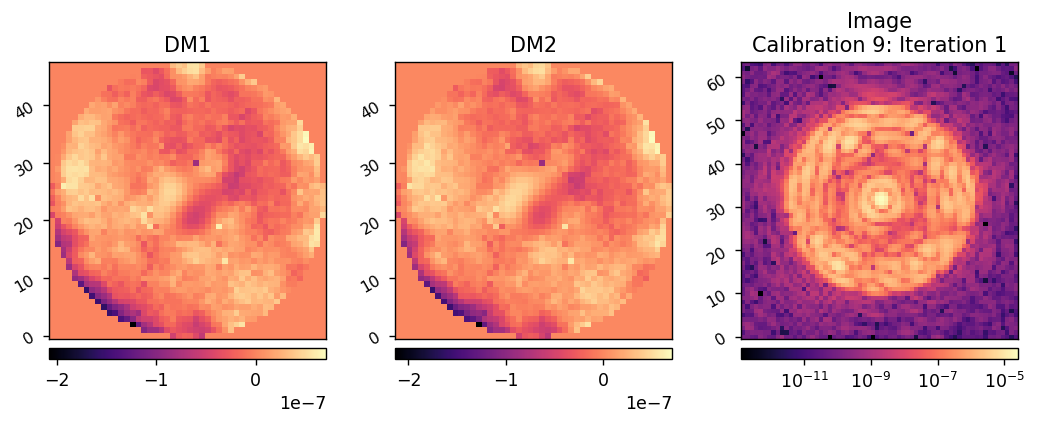

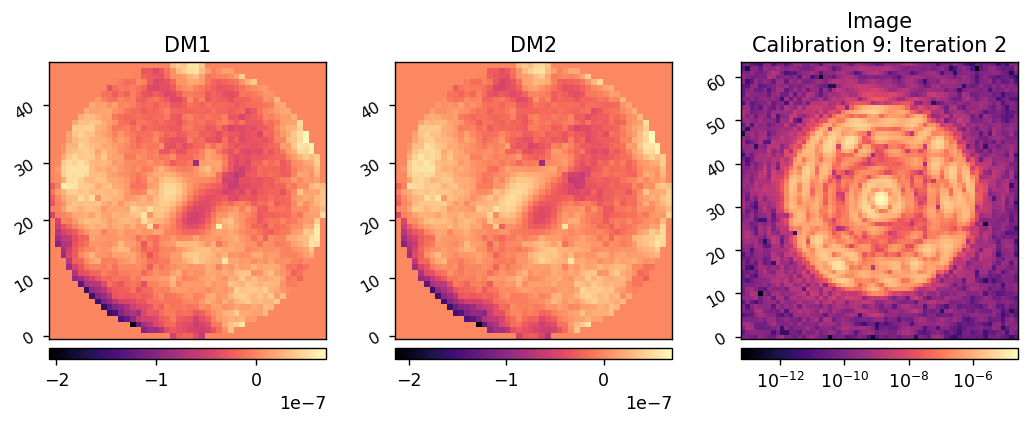

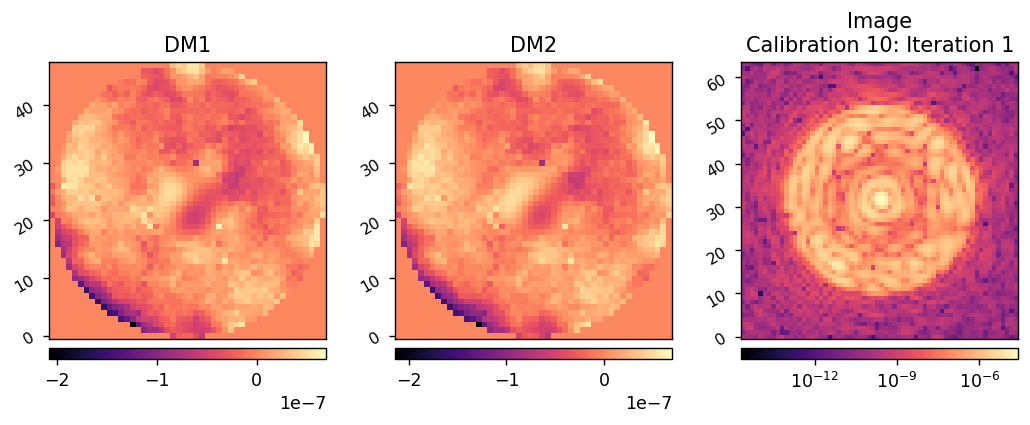

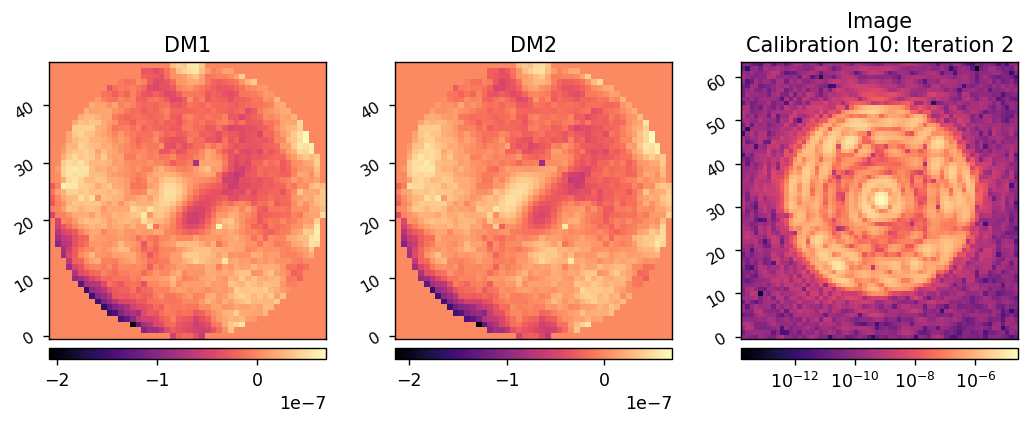

In [17]:
n_calibrations = 10
n_iefc_iterations_per_calib = 2

for i in range(n_calibrations):
    for j in range(n_iefc_iterations_per_calib):
        misc.myimshow3(dm1_acts[i,j], dm2_acts[i,j], images[i,j], 
                       'DM1', 'DM2', 'Image\nCalibration {:d}: Iteration {:d}'.format(i+1,j+1), 
                       lognorm3=True,)